**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            <center>Project - Predictive Modelling</center>
        </span>
    </font>
</h2>

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            I. Jupyter Notebook General Settings:
        </span>
    </font>
</h2>

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            A. Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# For splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

# statsmodels for Linear Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For LDA - Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# For CART - Classification And Regression Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# For Classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

# For Heteroscedasticity test
import statsmodels.stats.api as sms

# For QQ Plot - Assumption for Linear Regression
import pylab
import scipy.stats as stats

# For testing of homoscedastic or hetroscedasticity in Linear Regression
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# For Autocorrelation of the Residuals in Linear Regression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            B. Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            C. Adjust Jupyer Settings for Better Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.set_option('display.max_info_columns',200)
pd.options.display.float_format='{:.2f}'.format

Problem 2- Logistic Regression, LDA and CART:
---------------------------------------------------------------------

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Data Dictionary:

1. Wife's age (numerical)  
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary  
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary  
4. Number of children ever born (numerical)  
5. Wife's religion (binary) Non-Scientology, Scientology  
6. Wife's now working? (binary) Yes, No  
7. Husband's occupation (categorical) 1, 2, 3, 4(random)  
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high  
9. Media exposure (binary) Good, Not good  
10. Contraceptive method used (class attribute) No,Yes  

Important Note: Please reflect on all that you have learned while working on this project. This step is critical in cementing all your concepts and closing the loop. Please write down your thoughts here.

<a id="data"></a>
<h2>
    <font size="3" color = black >
        <span style='font-family:Georgia'>
            <div style='text-align: justify;'>
                2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, 
check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.
            </div>
        </span>
    </font>
</h2>

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.1 Reading the Data from the source
            </span>   
        </font>    
</h3>

In [116]:
survey_df = pd.read_excel('Contraceptive_method_dataset.xlsx')

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.2 Displaying the first 5 and last 5 records in the dataset
            </span>   
        </font>    
</h3>

In [117]:
survey_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.00000000,Primary,Secondary,3.00000000,Scientology,No,2,High,Exposed,No
1,45.00000000,Uneducated,Secondary,10.00000000,Scientology,No,3,Very High,Exposed,No
2,43.00000000,Primary,Secondary,7.00000000,Scientology,No,3,Very High,Exposed,No
3,42.00000000,Secondary,Primary,9.00000000,Scientology,No,3,High,Exposed,No
4,36.00000000,Secondary,Secondary,8.00000000,Scientology,No,3,Low,Exposed,No


In [118]:
survey_df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.00000000,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.00000000,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.00000000,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.00000000,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.00000000,Secondary,Secondary,1.00000000,Scientology,No,2,Very High,Exposed,Yes


<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.3 Checking the shape, size and datatypes of the dataset
            </span>   
        </font>    
</h3>

In [119]:
# Database dimension
print("Dataset dimension - usage_data                          :",survey_df.shape)

#Database size
print("Dataset size - usage_data                               :",survey_df.size)

Dataset dimension - usage_data                          : (1473, 10)
Dataset size - usage_data                               : 14730


In [120]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [121]:
survey_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.00000000,32.60627675,8.27492729,16.00000000,26.00000000,32.00000000,39.00000000,49.00000000
No_of_children_born,1452.00000000,3.25413223,2.36521210,0.00000000,1.00000000,3.00000000,4.00000000,16.00000000
Husband_Occupation,1473.00000000,2.13781399,0.86485727,1.00000000,1.00000000,2.00000000,3.00000000,4.00000000


<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.4 Checking Missing Values, Duplicate values and Unique Values
            </span>   
        </font>    
</h3>

In [122]:
survey_df.Wife_age.unique()

array([24., 45., 43., 42., 36., 19., 38., 21., 27., 44., 26., 48., 39.,
       37., 46., 40., 29., 31., 33., 25., 28., 47., 32., 49., 34., 20.,
       22., 30., 23., 35., 41., 17., 18., 16., nan])

In [123]:
survey_df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [124]:
survey_df['Wife_age'].median()

32.0

In [125]:
survey_df['Wife_age'].mean()

32.606276747503564

In [126]:
survey_df['No_of_children_born'].unique()

array([ 3., 10.,  7.,  9.,  8.,  0.,  6.,  1.,  2.,  4.,  5., 12., 11.,
       13., 16., nan])

In [127]:
survey_df['No_of_children_born'].median()

3.0

In [128]:
round(survey_df['No_of_children_born'].mean(),2)

3.25

In [129]:
survey_df['Wife_age']=survey_df['Wife_age'].fillna(survey_df['Wife_age'].median())
survey_df['No_of_children_born']=survey_df['No_of_children_born'].fillna(survey_df['No_of_children_born'].median())

In [130]:
survey_df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [131]:
survey_df.nunique()

Wife_age                     34
Wife_ education               4
Husband_education             4
No_of_children_born          15
Wife_religion                 2
Wife_Working                  2
Husband_Occupation            4
Standard_of_living_index      4
Media_exposure                2
Contraceptive_method_used     2
dtype: int64

In [132]:
survey_df.duplicated().sum()

85

In [133]:
# To list all the duplicate values
survey_df.loc[survey_df.duplicated(keep=False),:]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
26,38.00000000,Tertiary,Tertiary,1.00000000,Scientology,Yes,1,Very High,Exposed,No
30,31.00000000,Secondary,Tertiary,2.00000000,Scientology,No,1,Very High,Exposed,No
48,26.00000000,Tertiary,Tertiary,1.00000000,Scientology,No,1,Very High,Exposed,No
58,21.00000000,Primary,Secondary,0.00000000,Scientology,No,3,Very High,Exposed,No
76,29.00000000,Tertiary,Tertiary,0.00000000,Scientology,Yes,2,Very High,Exposed,No
79,38.00000000,Tertiary,Tertiary,1.00000000,Scientology,Yes,1,Very High,Exposed,No
81,49.00000000,Tertiary,Tertiary,6.00000000,Non-Scientology,Yes,1,Very High,Exposed,No
84,30.00000000,Tertiary,Tertiary,2.00000000,Scientology,No,1,Very High,Exposed,No
167,26.00000000,Tertiary,Tertiary,1.00000000,Scientology,No,1,Very High,Exposed,No
170,47.00000000,Tertiary,Tertiary,4.00000000,Scientology,No,1,Very High,Exposed,No


In [134]:
# Keeping the first of duplicate record and removing the rest
survey_df.drop_duplicates(keep='first',inplace=True)

In [135]:
# To list all the duplicate values
survey_df.loc[survey_df.duplicated(keep=False),:]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used


In [136]:
survey_df.duplicated().sum()

0

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.5 Check for Outlier and Outlier Treatment
            </span>   
        </font>    
</h3>

In [137]:
survey_df.select_dtypes(include=['float64','int64']).columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation'], dtype='object')

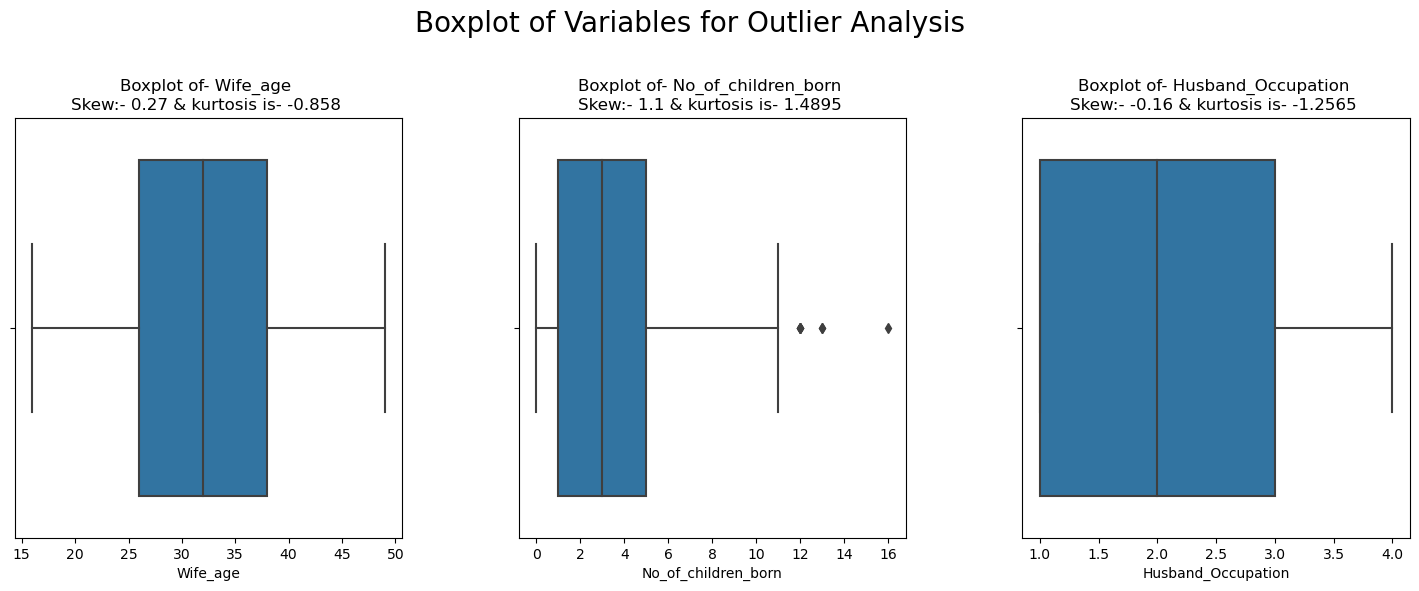

In [138]:
fig = plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.5, top=0.8, wspace= 0.3, bottom = 0.1)
fig.tight_layout()
for i, col in enumerate(survey_df.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(1,3,i+1)
    sns.boxplot(x=survey_df[col], ax = ax1)
    ax1.title.set_text(f'Boxplot of- {col} \nSkew:- {round(survey_df[col].skew(),2)} & kurtosis is- {round(survey_df[col].kurtosis(),4)} ')

plt.suptitle('Boxplot of Variables for Outlier Analysis', fontsize=20)
plt.show()

Logistic Regression models are not much impacted due to the presence of outliers because the sigmoid function tapers the outliers. So, the outliers are not treated.

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1.6 Univariate ,Bivariate and Multivariate Analysis
            </span>   
        </font>    
</h3>

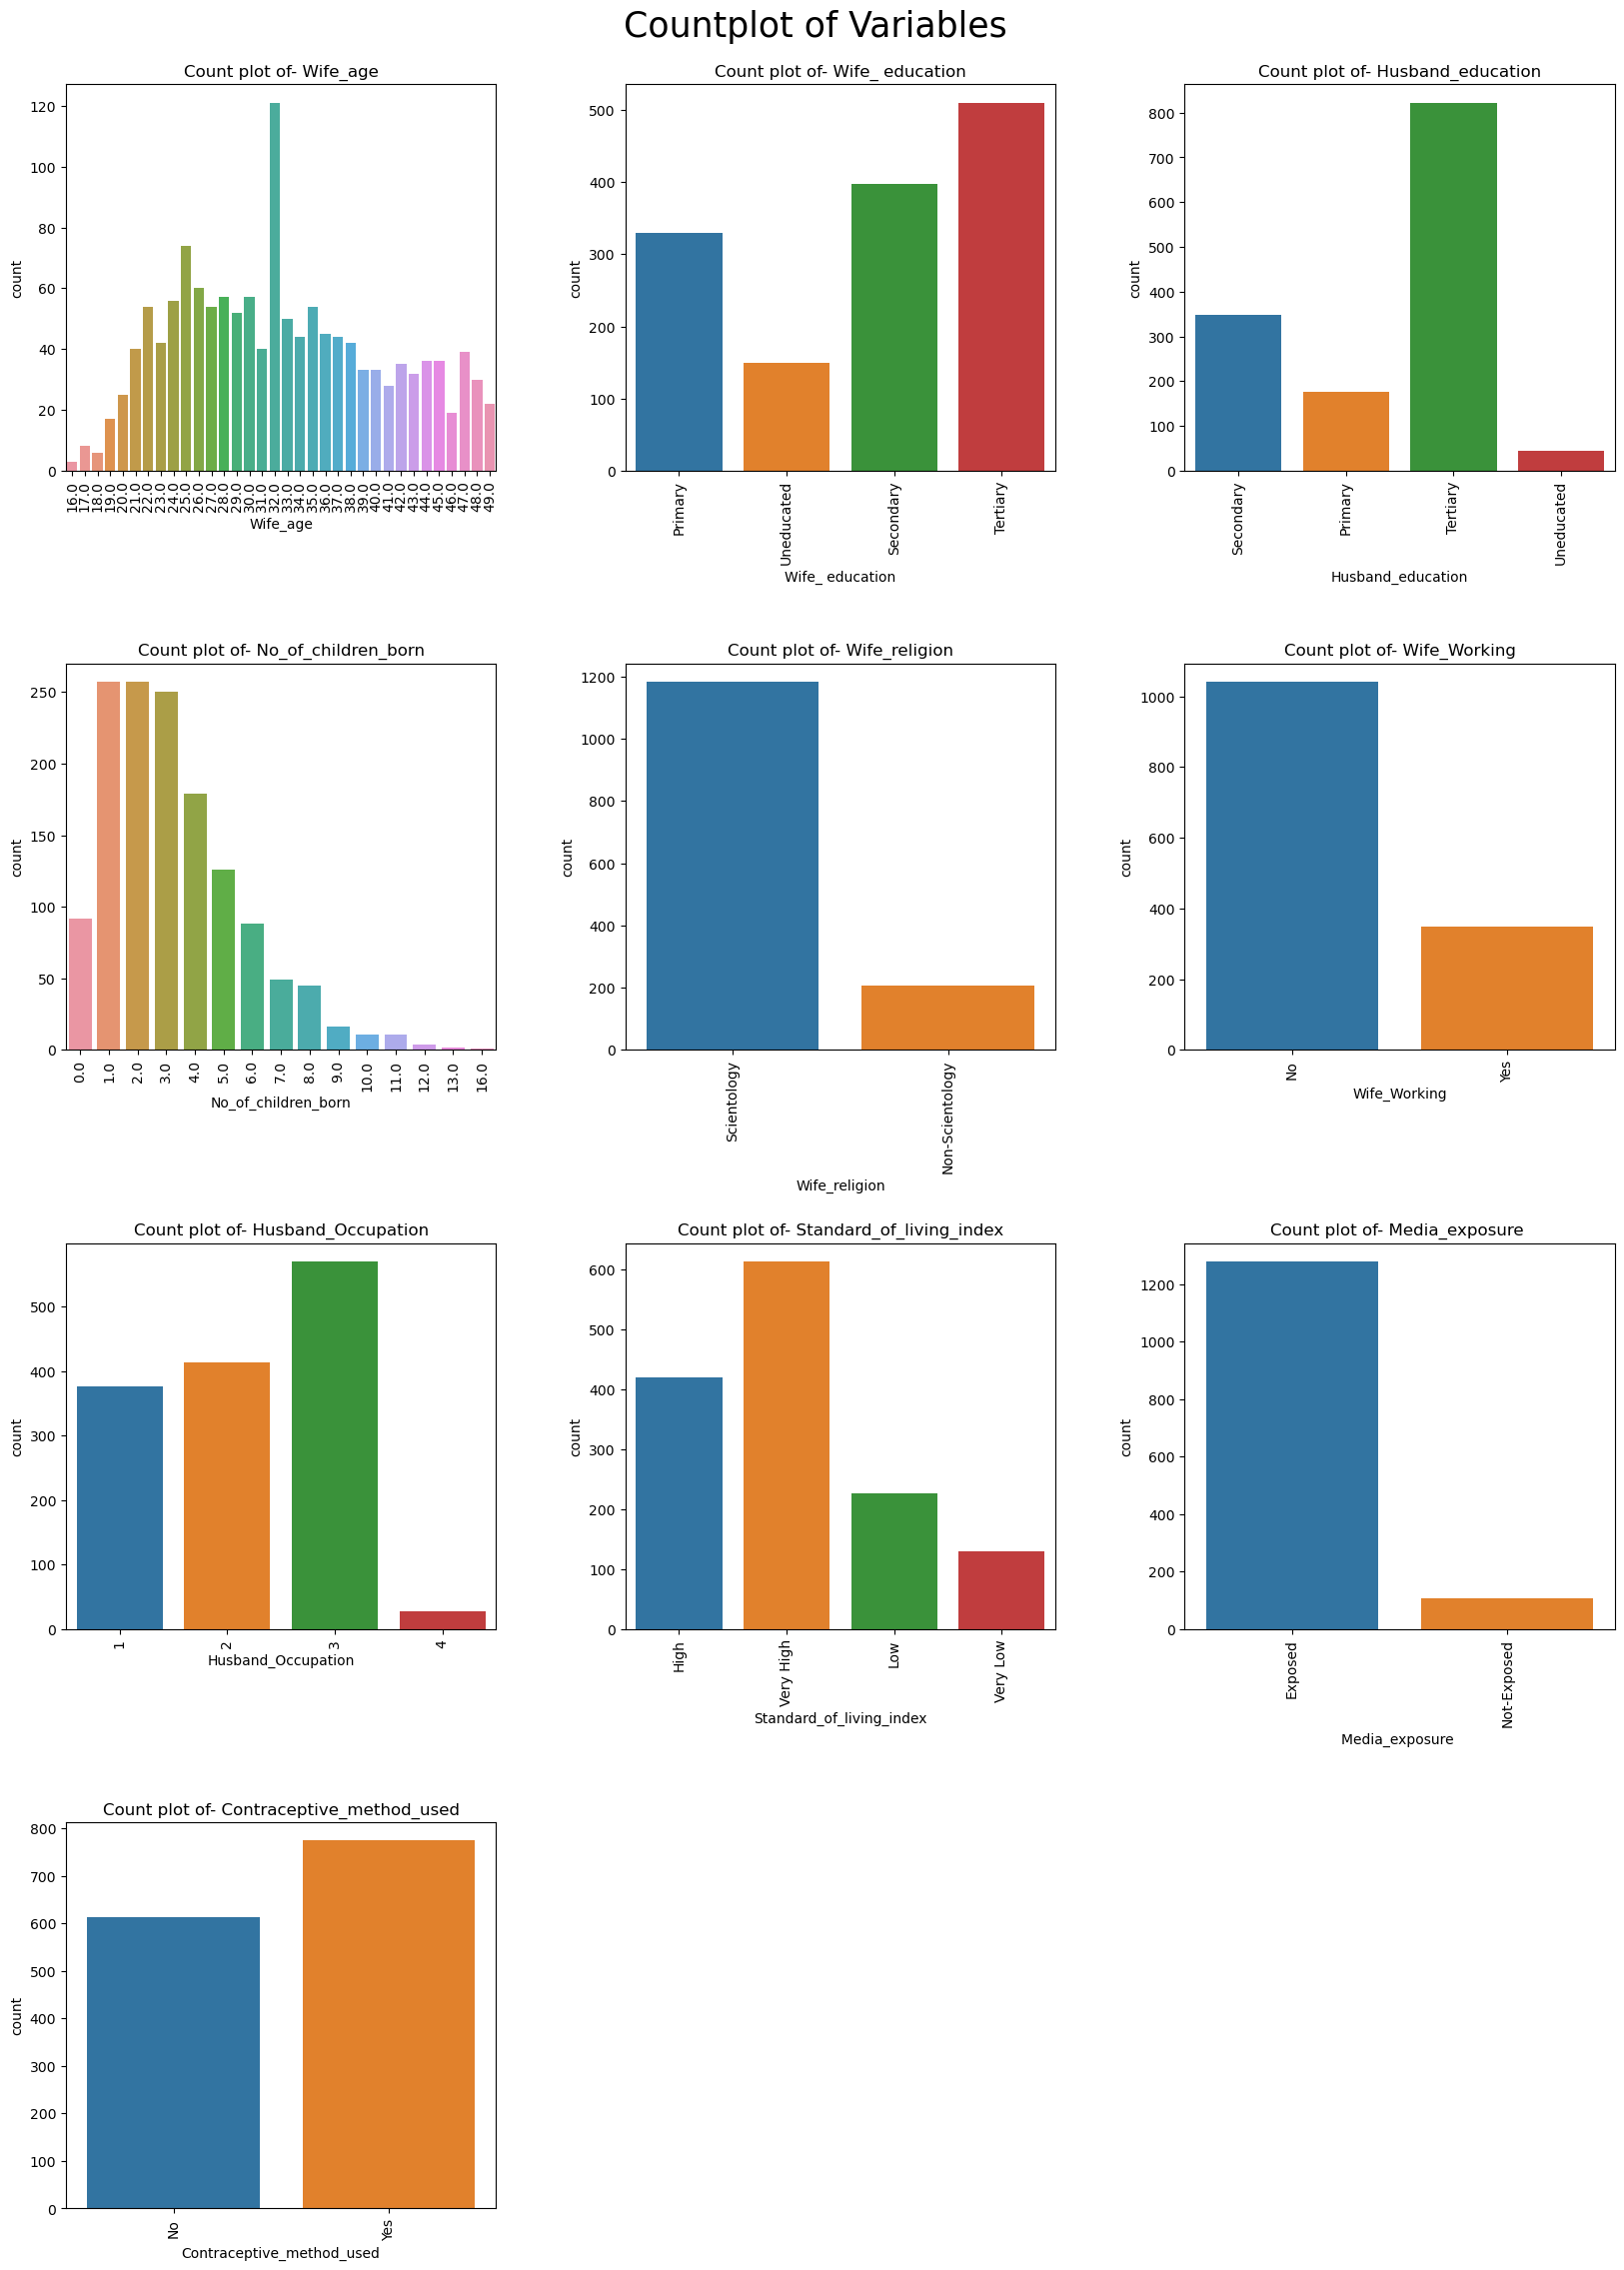

In [139]:
fig = plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()
for i, col in enumerate(survey_df.columns): # select_dtypes(include=['float64','int64'])
    ax1 = fig.add_subplot(4,3,i+1)
    sns.countplot(data = survey_df, x=col, ax = ax1)
    ax1.tick_params(axis='x', rotation=90)
    ax1.title.set_text(f'Count plot of- {col}')

plt.suptitle('Countplot of Variables', fontsize=25)
plt.show()

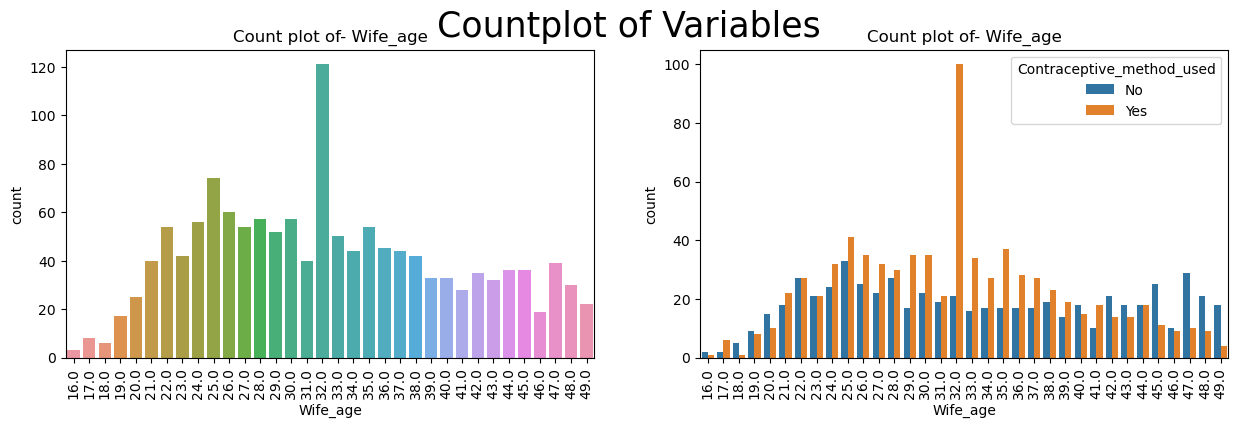

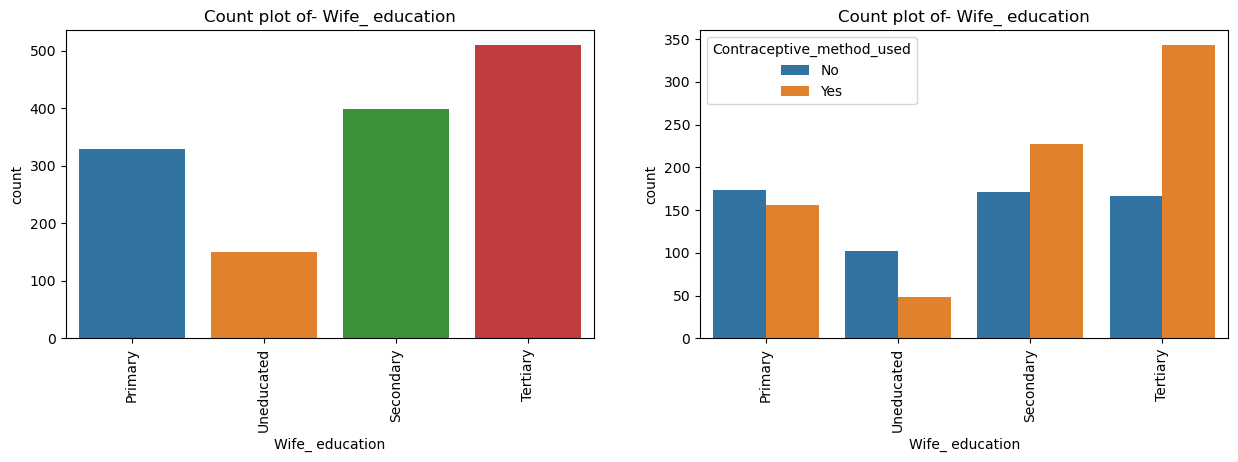

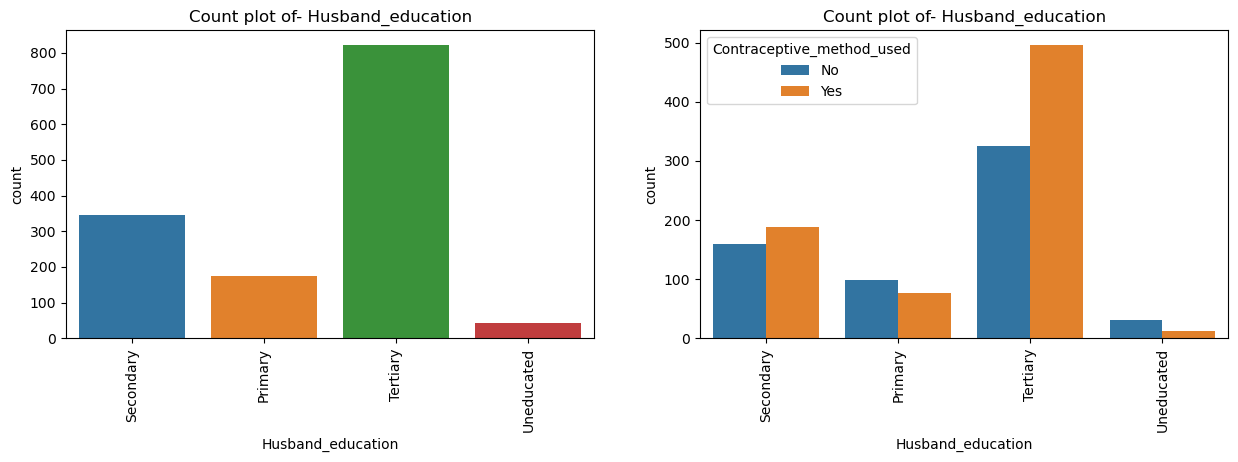

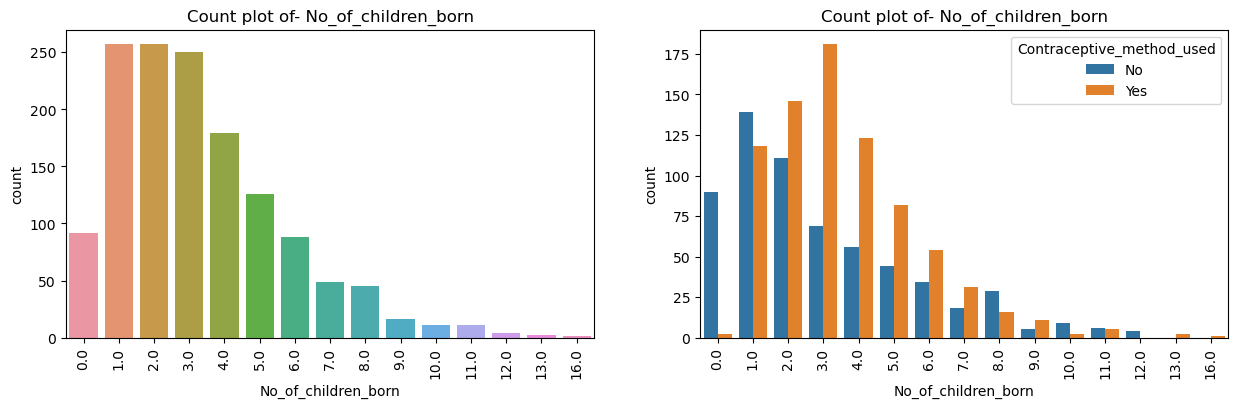

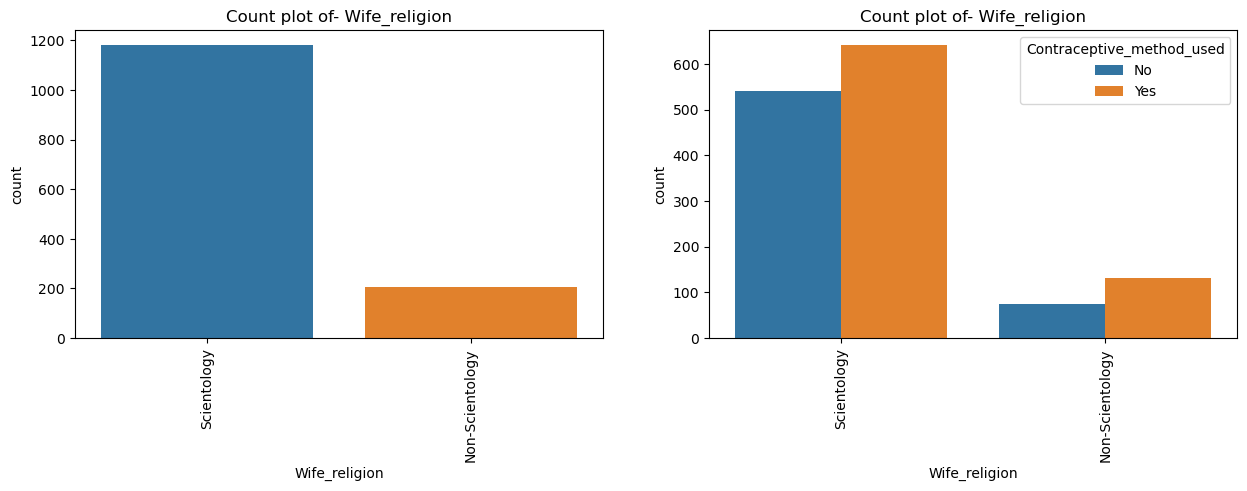

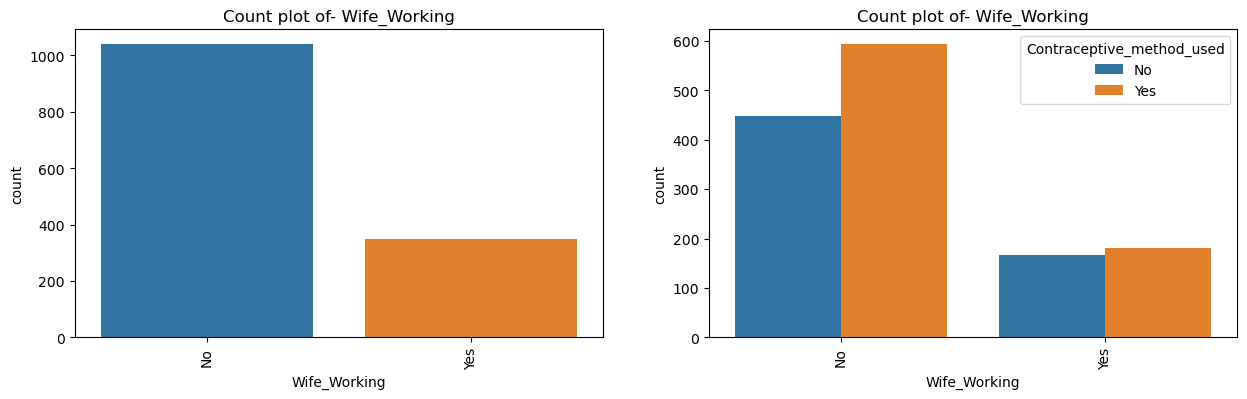

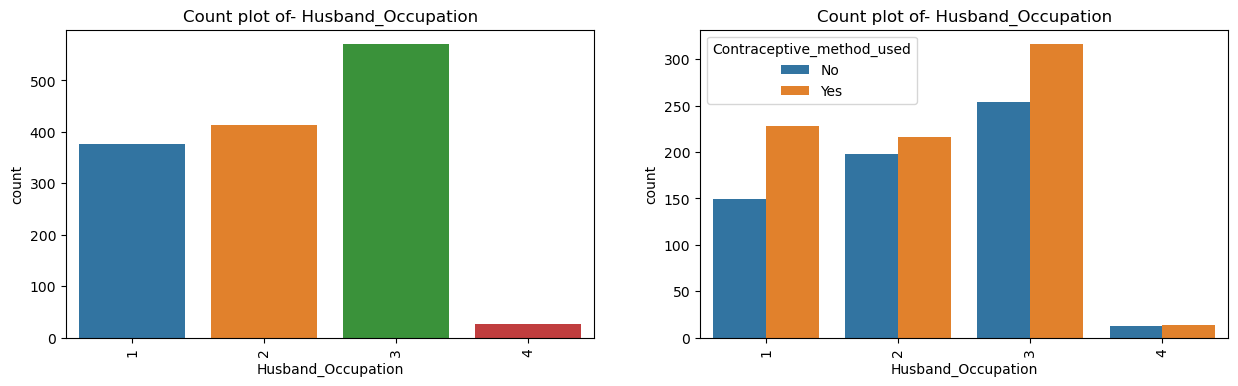

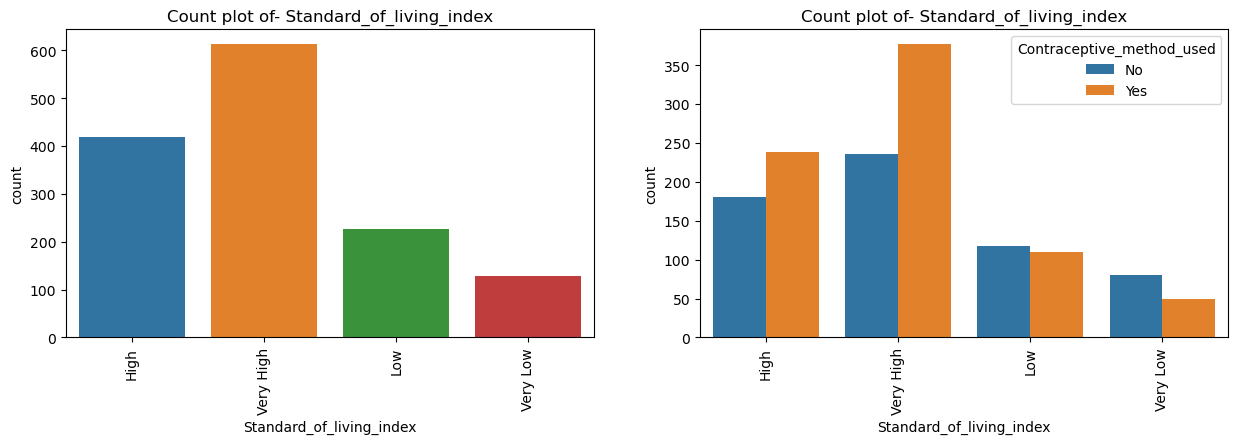

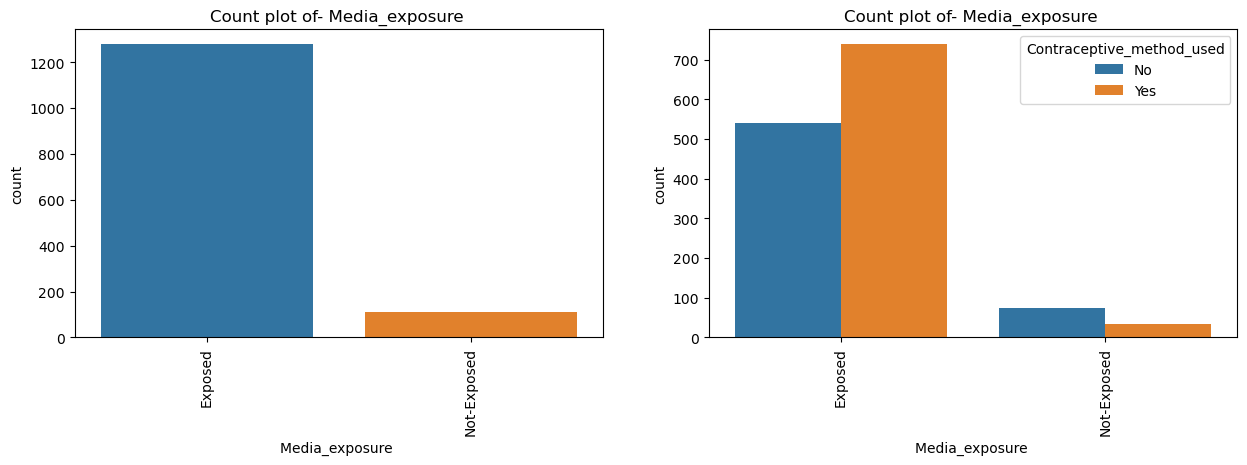

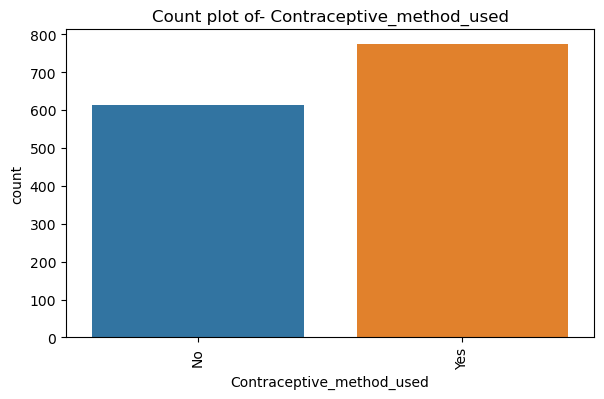

In [140]:
for idx, col in enumerate(survey_df.columns):
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    sns.countplot(data = survey_df, x=survey_df[col], ax = ax1)
    ax1.tick_params(axis='x', rotation=90)
    ax1.title.set_text(f'Count plot of- {col}')
    if col!='Contraceptive_method_used':
        sns.countplot( data=survey_df, x=survey_df[col], hue='Contraceptive_method_used',ax =ax2)
        ax2.tick_params(axis='x', rotation=90)
        ax2.title.set_text(f'Count plot of- {col}')
    else:
        fig.delaxes(ax2)
    if idx==0:
        plt.suptitle('Countplot of Variables', fontsize=25)
plt.show()

In [141]:
survey_df2 = survey_df.copy()
survey_df2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.00000000,Primary,Secondary,3.00000000,Scientology,No,2,High,Exposed,No
1,45.00000000,Uneducated,Secondary,10.00000000,Scientology,No,3,Very High,Exposed,No
2,43.00000000,Primary,Secondary,7.00000000,Scientology,No,3,Very High,Exposed,No
3,42.00000000,Secondary,Primary,9.00000000,Scientology,No,3,High,Exposed,No
4,36.00000000,Secondary,Secondary,8.00000000,Scientology,No,3,Low,Exposed,No


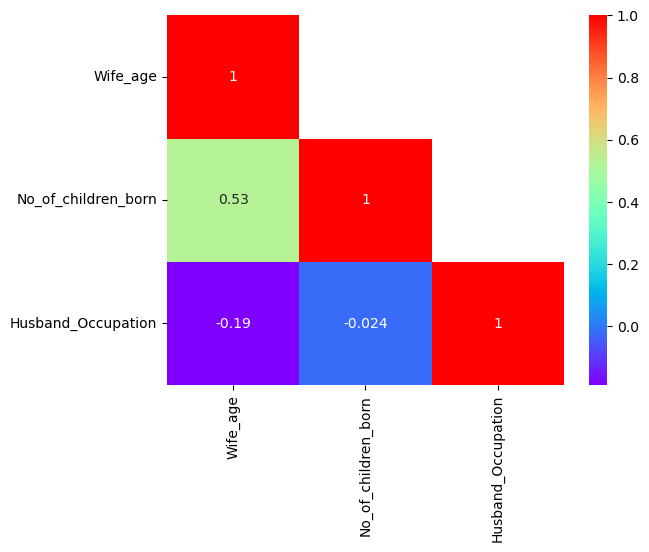

In [142]:
sns.heatmap(data=survey_df.corr(), annot=True, cmap='rainbow',mask=np.triu(survey_df.corr(),+1));
plt.show()

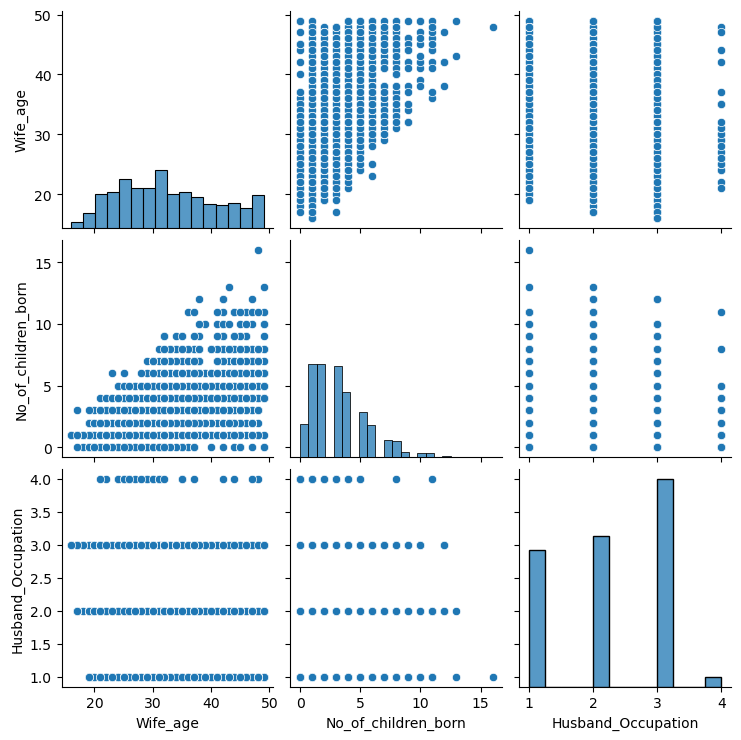

In [143]:
sns.pairplot(data=survey_df);
plt.show()

In [144]:
for column in survey_df.columns:
    if survey_df[column].dtype == 'object':
        print('\n')
        print('feature:',column)
        print(pd.Categorical(survey_df[column].unique()))
        print(pd.Categorical(survey_df[column].unique()).codes)
        survey_df2[column]=pd.Categorical(survey_df[column]).codes



feature: Wife_ education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


feature: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


feature: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


feature: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


feature: Media_exposure 
['Exposed', 'Not-Exposed']
Categories (2, object): ['Exposed', 'Not-Exposed']
[0 1]


feature: Contraceptive_method_used
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [145]:
survey_df2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.00000000,0,1,3.00000000,1,0,2,0,0,0
1,45.00000000,3,1,10.00000000,1,0,3,2,0,0
2,43.00000000,0,1,7.00000000,1,0,3,2,0,0
3,42.00000000,1,0,9.00000000,1,0,3,0,0,0
4,36.00000000,1,1,8.00000000,1,0,3,1,0,0


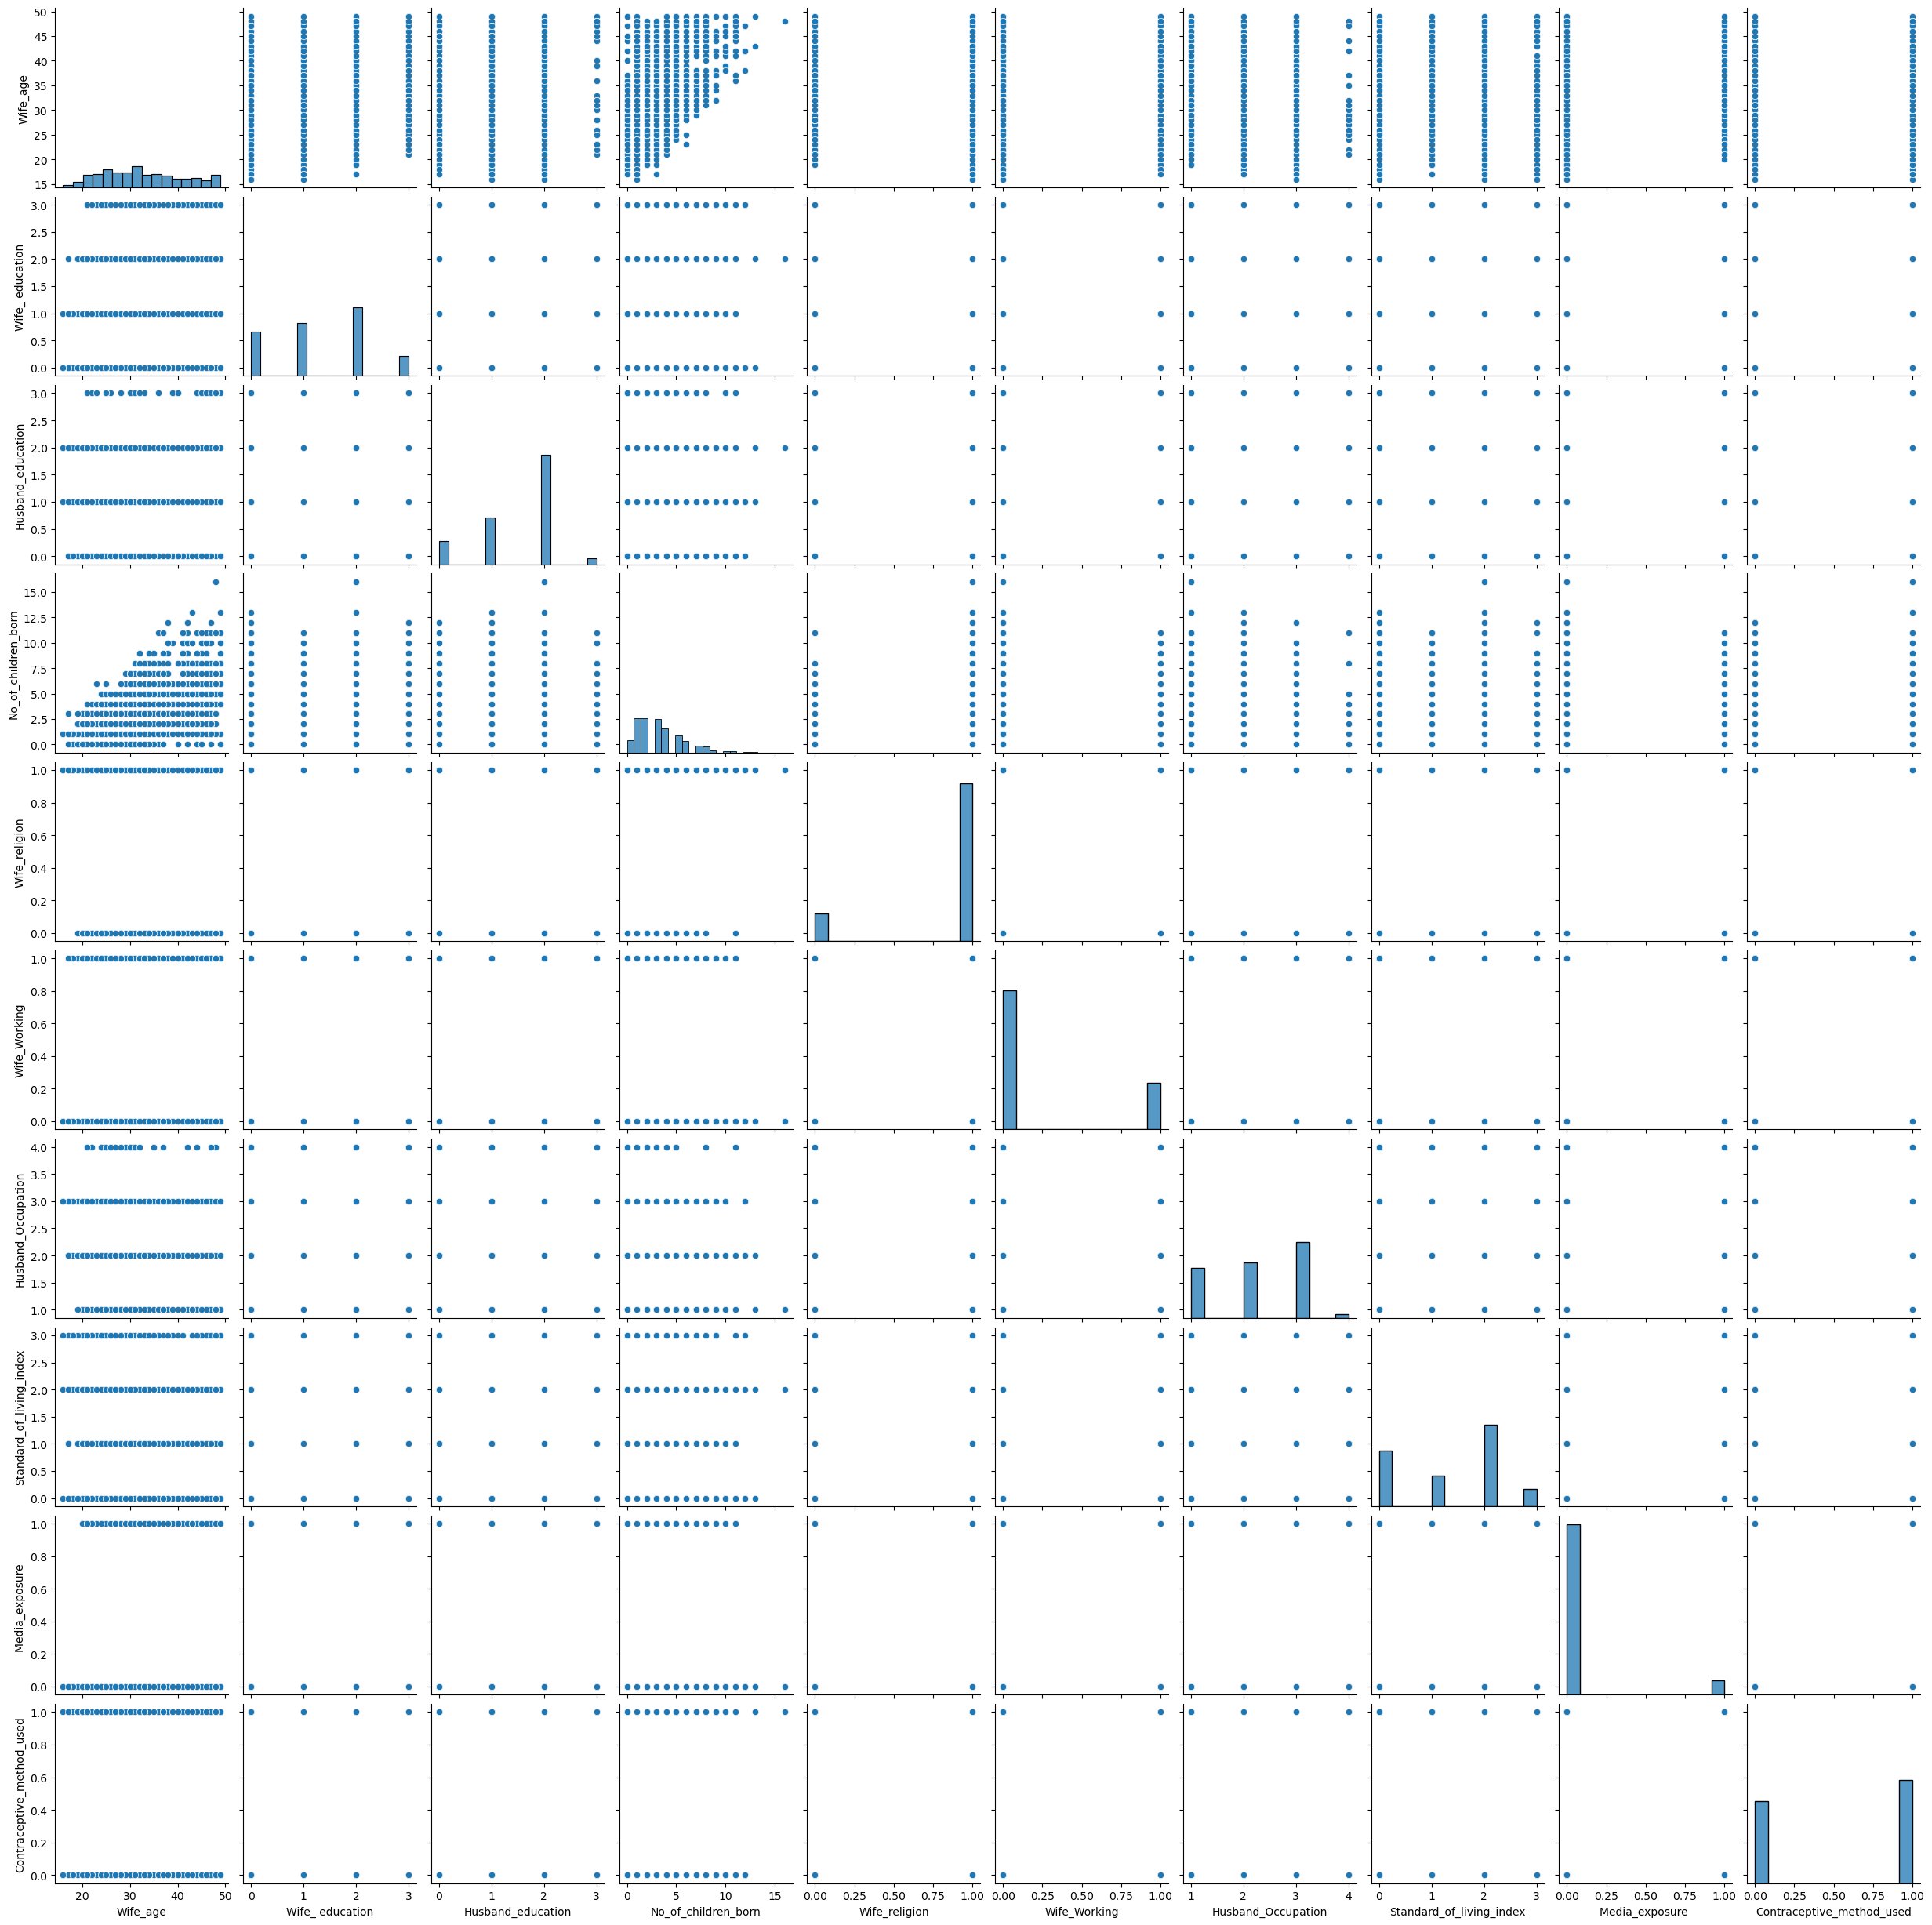

In [146]:
sns.pairplot(data=survey_df2);
plt.show()

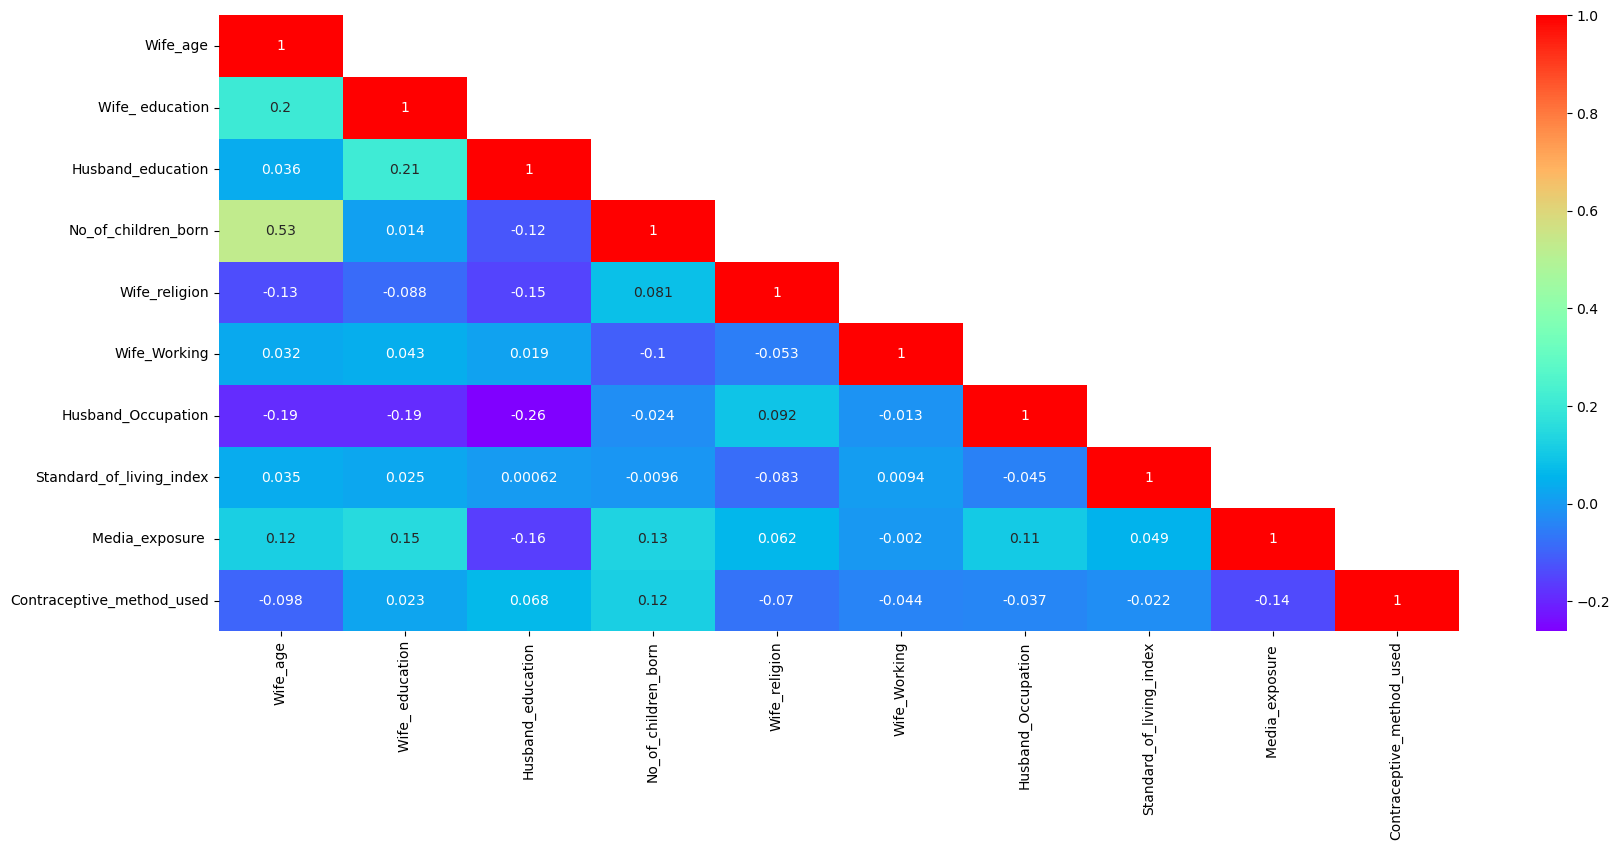

In [147]:
plt.figure(figsize=(20,8))
sns.heatmap(data=survey_df2.corr(), annot=True, cmap='rainbow',mask=np.triu(survey_df2.corr(),+1));
plt.show()

<a id="data"></a>
<h2>
    <font size="3" color = black >
        <span style='font-family:Georgia'>
            <div style='text-align: justify;'>
                2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split 
the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) 
and CART.
            </div>
        </span>
    </font>
</h2>

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.2.1 Encoding the data (having object data type - string values) for Modelling
            </span>   
        </font>    
</h3>

In [148]:
for column in survey_df.columns:
    if survey_df[column].dtype == 'object':
        print('\n')
        print('feature:',column)
        print(pd.Categorical(survey_df[column].unique()))
        print(pd.Categorical(survey_df[column].unique()).codes)
        survey_df[column]=pd.Categorical(survey_df[column]).codes



feature: Wife_ education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


feature: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


feature: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


feature: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


feature: Media_exposure 
['Exposed', 'Not-Exposed']
Categories (2, object): ['Exposed', 'Not-Exposed']
[0 1]


feature: Contraceptive_method_used
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.2.2 Split the data into train and test (70:30)
            </span>   
        </font>    
</h3>

In [149]:
X = survey_df.drop(['Contraceptive_method_used'],axis=1)
y = survey_df['Contraceptive_method_used']

In [150]:
X.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
0,24.00000000,0,1,3.00000000,1,0,2,0,0
1,45.00000000,3,1,10.00000000,1,0,3,2,0
2,43.00000000,0,1,7.00000000,1,0,3,2,0
3,42.00000000,1,0,9.00000000,1,0,3,0,0
4,36.00000000,1,1,8.00000000,1,0,3,1,0


In [151]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Contraceptive_method_used, dtype: int8

In [152]:
test_size = 0.30
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=seed)

In [153]:
X_train.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
456,36.00000000,2,2,3.00000000,1,0,1,2,0
158,45.00000000,3,2,5.00000000,1,0,1,1,1
1295,31.00000000,0,0,4.00000000,1,0,4,0,1
444,49.00000000,2,2,10.00000000,1,0,1,2,0
673,45.00000000,3,1,3.00000000,1,0,3,1,0


In [154]:
y_train.head()

456     1
158     0
1295    1
444     1
673     1
Name: Contraceptive_method_used, dtype: int8

In [155]:
X_test.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
307,39.00000000,1,2,6.00000000,1,0,1,2,0
1039,24.00000000,1,2,0.00000000,1,1,2,0,0
1375,26.00000000,1,1,2.00000000,1,1,2,1,0
104,23.00000000,0,2,2.00000000,1,0,3,0,0
563,43.00000000,1,2,5.00000000,1,0,3,1,1


In [156]:
y_test.head()

307     0
1039    0
1375    1
104     0
563     1
Name: Contraceptive_method_used, dtype: int8

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.2.3 Logistic Regression
            </span>   
        </font>    
</h3>

In [157]:
logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [158]:
y_logistic_train_predict = logistic_model.predict(X_train)
y_logistic_test_predict = logistic_model.predict(X_test)

In [159]:
y_logistic_train_predict_prob = logistic_model.predict_proba(X_train)
y_logistic_test_predict_prob = logistic_model.predict_proba(X_test)

In [160]:
pd.DataFrame(y_logistic_train_predict_prob).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.43528260,0.69697537,0.77100285,0.23785913,0.64049812,0.24751036,0.36362715,0.34402957,0.34331134,0.49455862,0.56496642,0.49209625,0.63726121,0.45479758,0.27049471,0.54723345,0.30338386,0.48018645,0.47258633,0.32587504
1,0.56471740,0.30302463,0.22899715,0.76214087,0.35950188,0.75248964,0.63637285,0.65597043,0.65668866,0.50544138,0.43503358,0.50790375,0.36273879,0.54520242,0.72950529,0.45276655,0.69661614,0.51981355,0.52741367,0.67412496


In [161]:
pd.DataFrame(y_logistic_test_predict_prob).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.34712554,0.50434753,0.43696631,0.40641155,0.78874146,0.31384995,0.63298085,0.37448692,0.39650697,0.57048768,0.31885001,0.31223567,0.66403131,0.34425058,0.73624812,0.45413733,0.43947824,0.36937977,0.55626592,0.31385312
1,0.65287446,0.49565247,0.56303369,0.59358845,0.21125854,0.68615005,0.36701915,0.62551308,0.60349303,0.42951232,0.68114999,0.68776433,0.33596869,0.65574942,0.26375188,0.54586267,0.56052176,0.63062023,0.44373408,0.68614688


<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.2.4 Linear Disciminant Analysis - LDA
            </span>   
        </font>    
</h3>

In [162]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [163]:
print('lda_model.coef_: ',lda_model.coef_)
print('lda_model.intercept_: ',lda_model.intercept_)

lda_model.coef_:  [[-8.10842710e-02  2.24122222e-01  1.35021030e-01  2.73055916e-01
  -4.82252003e-01 -8.20062180e-02 -9.97874737e-02 -7.56048888e-04
  -1.10303662e+00]]
lda_model.intercept_:  [2.2414205]


In [164]:
y_lda_train_predicted=lda_model.predict(X_train)
y_lda_test_predicted=lda_model.predict(X_test)

In [165]:
y_lda_train_predicted_prob=lda_model.predict_proba(X_train)
y_lda_test_predicted_prob=lda_model.predict_proba(X_test)

In [166]:
pd.DataFrame(y_lda_train_predicted_prob).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.43136371,0.68686762,0.76213252,0.24350005,0.63718956,0.24473519,0.36442757,0.34670779,0.34034777,0.48445957,0.56159126,0.48635004,0.63140608,0.45158140,0.27632808,0.54498133,0.29606366,0.46843241,0.46695296,0.32819769
1,0.56863629,0.31313238,0.23786748,0.75649995,0.36281044,0.75526481,0.63557243,0.65329221,0.65965223,0.51554043,0.43840874,0.51364996,0.36859392,0.54841860,0.72367192,0.45501867,0.70393634,0.53156759,0.53304704,0.67180231


In [167]:
pd.DataFrame(y_lda_test_predicted_prob).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.34794553,0.49356808,0.43195105,0.39866715,0.78094235,0.30670094,0.62624445,0.36894005,0.39017084,0.56374455,0.32214692,0.31432166,0.64823243,0.33979879,0.73115742,0.44773265,0.43626770,0.36306711,0.55236137,0.32175416
1,0.65205447,0.50643192,0.56804895,0.60133285,0.21905765,0.69329906,0.37375555,0.63105995,0.60982916,0.43625545,0.67785308,0.68567834,0.35176757,0.66020121,0.26884258,0.55226735,0.56373230,0.63693289,0.44763863,0.67824584


<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.2.5 CART- Classification and Regression Tree (CART)
            </span>   
        </font>    
</h3>

In [168]:
cart_model = DecisionTreeClassifier(criterion='gini', random_state=123, max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [169]:
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30,
                       random_state=123)

In [170]:
cart_train_label = ['No', 'Yes']
Survey_Tree_File = open('survey_tree.dot','w')
dot_data = tree.export_graphviz(cart_model, out_file=Survey_Tree_File, feature_names = list(X_train), class_names = list(cart_train_label))
Survey_Tree_File.close()

In [171]:
pd.DataFrame(cart_model.feature_importances_, columns=['Importance'], index=X.columns).sort_values(by='Importance', ascending=False)

,Importance
No_of_children_born,0.39907591
Wife_age,0.35812544
Wife_ education,0.17533917
Media_exposure,0.02871942
Standard_of_living_index,0.02853394
Husband_education,0.00730225
Husband_Occupation,0.00205828
Wife_religion,0.00084559
Wife_Working,0.00000000


In [172]:
y_cart_train_predict = cart_model.predict(X_train)
y_cart_test_predict = cart_model.predict(X_test)

In [173]:
y_cart_train_predict_prob=cart_model.predict_proba(X_train)
y_cart_test_predict_prob=cart_model.predict_proba(X_test)

In [174]:
pd.DataFrame(y_cart_train_predict_prob).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.15328467,0.92307692,0.38461538,0.10000000,0.80952381,0.20000000,0.55555556,0.55555556,0.15328467,0.38461538,0.15328467,0.69444444,0.48148148,0.15328467,0.80952381,0.26923077,0.12500000,1.00000000,0.75000000,0.47826087
1,0.84671533,0.07692308,0.61538462,0.90000000,0.19047619,0.80000000,0.44444444,0.44444444,0.84671533,0.61538462,0.84671533,0.30555556,0.51851852,0.84671533,0.19047619,0.73076923,0.87500000,0.00000000,0.25000000,0.52173913


In [175]:
pd.DataFrame(y_cart_test_predict_prob).head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.15328467,1.00000000,0.35849057,0.48148148,0.63636364,0.21739130,0.48148148,0.35849057,1.00000000,0.92307692,0.47222222,0.20000000,1.00000000,0.26153846,0.91666667,0.21739130,0.26923077,0.21739130,0.26923077,0.80952381
1,0.84671533,0.00000000,0.64150943,0.51851852,0.36363636,0.78260870,0.51851852,0.64150943,0.00000000,0.07692308,0.52777778,0.80000000,0.00000000,0.73846154,0.08333333,0.78260870,0.73076923,0.78260870,0.73076923,0.19047619


<a id="data"></a>
<h2>
    <font size="3" color = black >
        <span style='font-family:Georgia'>
            <div style='text-align: justify;'>
                2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, 
Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: 
Compare Both the models and write inference which model is best/optimized.
            </div>
        </span>
    </font>
</h2>

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.3.1 Performance Metrics: Logistic Regression
            </span>   
        </font>    
</h3>

**Logistic Model Score.**

In [176]:
print('Logistic Regression Accuracy Score for Training data- ',logistic_model.score(X_train,y_train))
print('Logistic Regression Accuracy Score for Test data- ',logistic_model.score(X_test,y_test))

Logistic Regression Accuracy Score for Training data-  0.6488156539649845
Logistic Regression Accuracy Score for Test data-  0.6163069544364509


**Confusion Matrix and Classification Report for Logistic Regression**

In [177]:
lr_train_cm=confusion_matrix(y_train, y_logistic_train_predict)
lr_test_cm=confusion_matrix(y_test, y_logistic_test_predict)
print('Confusion Matrix for Training Data- \n',lr_train_cm)
print('\nConfusion Matrix for Test Data- \n',lr_test_cm)

Confusion Matrix for Training Data- 
 [[182 242]
 [ 99 448]]

Confusion Matrix for Test Data- 
 [[ 77 113]
 [ 47 180]]


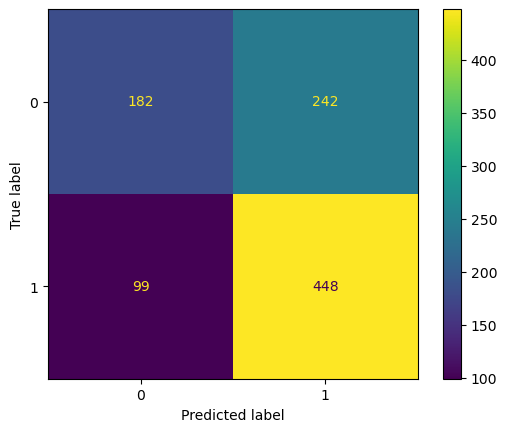

In [178]:
disp_lr_train = ConfusionMatrixDisplay(confusion_matrix=lr_train_cm, display_labels=logistic_model.classes_)
disp_lr_train.plot()
plt.grid(False)
plt.show()

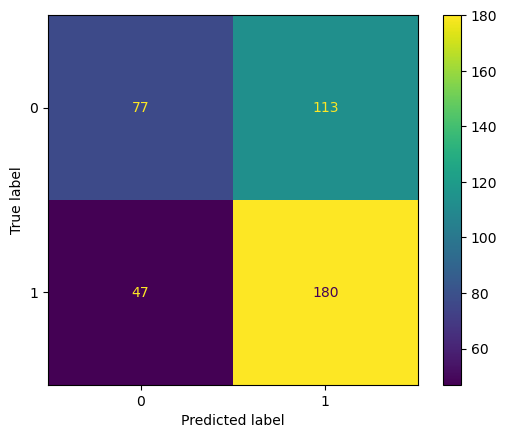

In [179]:
disp_lr_test = ConfusionMatrixDisplay(confusion_matrix=lr_test_cm, display_labels=logistic_model.classes_)
disp_lr_test.plot()
plt.grid(False)
plt.show()

In [180]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_logistic_train_predict))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_logistic_test_predict))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.65      0.43      0.52       424
           1       0.65      0.82      0.72       547

    accuracy                           0.65       971
   macro avg       0.65      0.62      0.62       971
weighted avg       0.65      0.65      0.63       971


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.62      0.41      0.49       190
           1       0.61      0.79      0.69       227

    accuracy                           0.62       417
   macro avg       0.62      0.60      0.59       417
weighted avg       0.62      0.62      0.60       417



**Plot ROC curve and get ROC_AUC score for Logistic Regression**

AUC for train data for Logistic Regression: 0.669
AUC for test data for Logistic Regression: 0.653


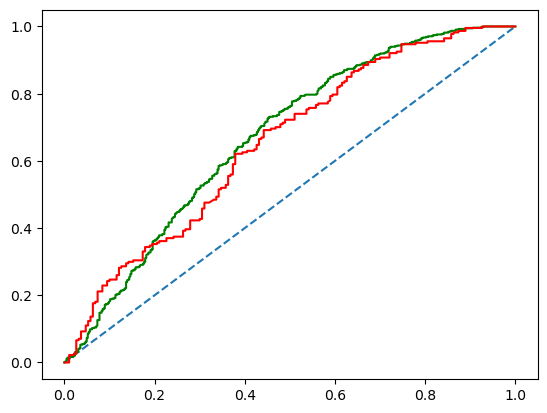

In [181]:
# predict probabilities
logistic_model_probs_train = logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
logistic_model_probs_train = logistic_model_probs_train[:,1]
# calculate AUC
logistic_model_auc_train = roc_auc_score(y_train, logistic_model_probs_train)
print('AUC for train data for Logistic Regression: %.3f' % logistic_model_auc_train)
#
# predict probabilities
logistic_model_probs_test = logistic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
logistic_model_probs_test = logistic_model_probs_test[:,1]
# calculate AUC
logistic_model_auc_test = roc_auc_score(y_test, logistic_model_probs_test)
print('AUC for test data for Logistic Regression: %.3f' % logistic_model_auc_test)

# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, logistic_model_probs_train)
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, logistic_model_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr, color='g')
plt.plot(lr_test_fpr, lr_test_tpr, color='r')
plt.show()

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.3.2 Performance Metrics: Linear Discriminant Analysis
            </span>   
        </font>    
</h3>

**Linear Discriminant Analysis - LDA Model Score.**

In [182]:
print('Linear Discriminant Analysis Accuracy Score for Training data- ',lda_model.score(X_train,y_train))
print('Linear Discriminant Analysis Accuracy Score for Test data- ',lda_model.score(X_test,y_test))

Linear Discriminant Analysis Accuracy Score for Training data-  0.6529351184346035
Linear Discriminant Analysis Accuracy Score for Test data-  0.6139088729016786


**Confusion Matrix and Classification Report for LDA**

In [183]:
lda_train_cm=confusion_matrix(y_train, y_lda_train_predicted)
lda_test_cm=confusion_matrix(y_test, y_lda_test_predicted)
print('Confusion Matrix for Training Data- \n',lda_train_cm)
print('\nConfusion Matrix for Test Data- \n',lda_test_cm)

Confusion Matrix for Training Data- 
 [[181 243]
 [ 94 453]]

Confusion Matrix for Test Data- 
 [[ 76 114]
 [ 47 180]]


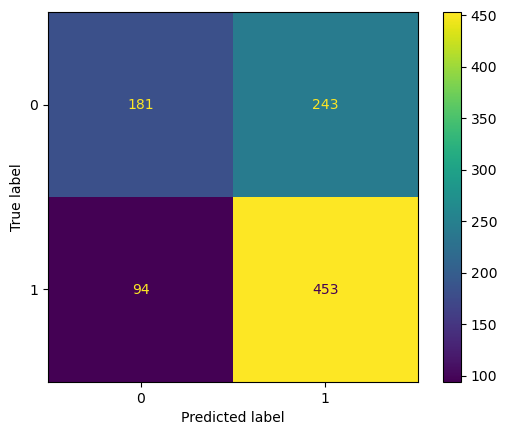

In [184]:
disp_lda_train = ConfusionMatrixDisplay(confusion_matrix=lda_train_cm, display_labels=lda_model.classes_)
disp_lda_train.plot()
plt.grid(False)
plt.show()

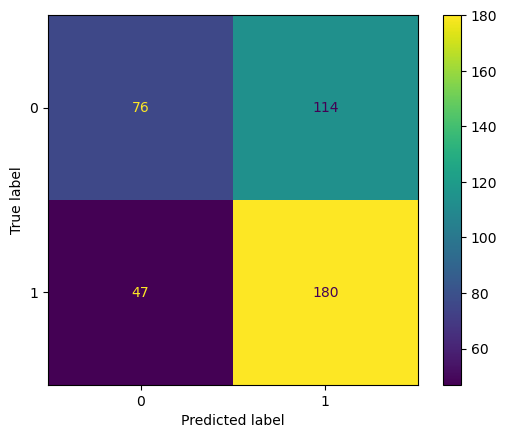

In [185]:
disp_lda_test = ConfusionMatrixDisplay(confusion_matrix=lda_test_cm, display_labels=lda_model.classes_)
disp_lda_test.plot()
plt.grid(False)
plt.show()

In [186]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lda_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lda_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.66      0.43      0.52       424
           1       0.65      0.83      0.73       547

    accuracy                           0.65       971
   macro avg       0.65      0.63      0.62       971
weighted avg       0.65      0.65      0.64       971


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.62      0.40      0.49       190
           1       0.61      0.79      0.69       227

    accuracy                           0.61       417
   macro avg       0.62      0.60      0.59       417
weighted avg       0.61      0.61      0.60       417



**Plot ROC curve and get ROC_AUC score for LDA**

AUC for train data for LDA: 0.669
AUC for test data for LDA: 0.653


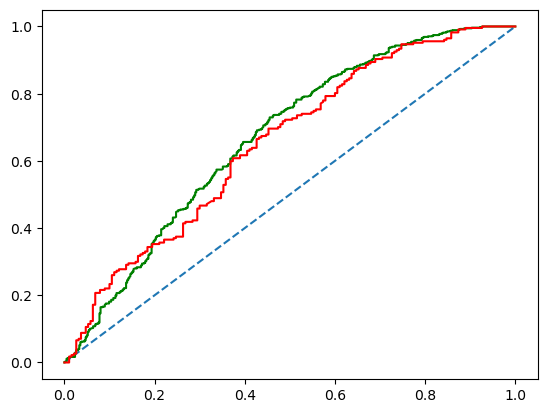

In [187]:
# predict probabilities for train data
lda_model_probs_train = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lda_model_probs_train = lda_model_probs_train[:,1]
# calculate AUC
lda_model_auc_train = roc_auc_score(y_train, lda_model_probs_train)
print('AUC for train data for LDA: %.3f' % lda_model_auc_train)
#
# predict probabilities for test data
lda_model_probs_test = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_model_probs_test = lda_model_probs_test[:,1]
# calculate AUC
lda_model_auc_test = roc_auc_score(y_test, lda_model_probs_test)
print('AUC for test data for LDA: %.3f' % lda_model_auc_test)
#
#
# calculate roc curve for train
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, lda_model_probs_train)
# calculate roc curve for test
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, lda_model_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# pot the roc curve for train model
plt.plot(lda_train_fpr, lda_train_tpr, color='green')
# plot the roc curve for the test model
plt.plot(lda_test_fpr, lda_test_tpr, color='r')
plt.show()

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.3.3 Performance Metrics: Classification and Regression Tree
            </span>   
        </font>    
</h3>

**CART Model Score.**

In [188]:
print('CART Accuracy Score for Training data- ',cart_model.score(X_train,y_train))
print('CART Accuracy Score for Test data- ',cart_model.score(X_test,y_test))

CART Accuracy Score for Training data-  0.7435633367662204
CART Accuracy Score for Test data-  0.6354916067146283


**Confusion Matrix and Classification Report for CART**

In [189]:
cart_train_cm=confusion_matrix(y_train, y_cart_train_predict)
cart_test_cm=confusion_matrix(y_test, y_cart_test_predict)
print('Confusion Matrix for Training Data- \n',cart_train_cm)
print('\nConfusion Matrix for Test Data- \n',cart_test_cm)

Confusion Matrix for Training Data- 
 [[250 174]
 [ 75 472]]

Confusion Matrix for Test Data- 
 [[ 88 102]
 [ 50 177]]


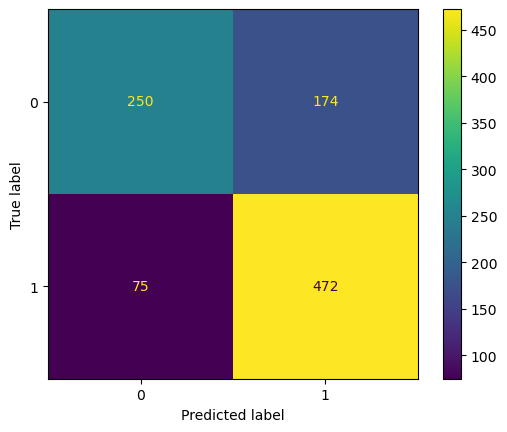

In [190]:
disp_cart_train = ConfusionMatrixDisplay(confusion_matrix=cart_train_cm, display_labels=cart_model.classes_)
disp_cart_train.plot()
plt.grid(False)
plt.show()

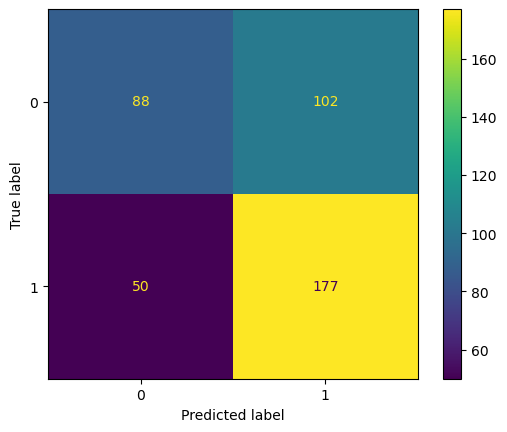

In [191]:
disp_cart_test = ConfusionMatrixDisplay(confusion_matrix=cart_test_cm, display_labels=cart_model.classes_)
disp_cart_test.plot()
plt.grid(False)
plt.show()

In [192]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_cart_train_predict))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_cart_test_predict))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.77      0.59      0.67       424
           1       0.73      0.86      0.79       547

    accuracy                           0.74       971
   macro avg       0.75      0.73      0.73       971
weighted avg       0.75      0.74      0.74       971


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.64      0.46      0.54       190
           1       0.63      0.78      0.70       227

    accuracy                           0.64       417
   macro avg       0.64      0.62      0.62       417
weighted avg       0.64      0.64      0.63       417



**Plot ROC curve and get ROC_AUC score for CART**

AUC for training data for CART model: 0.809
AUC for test data for CART model: 0.734


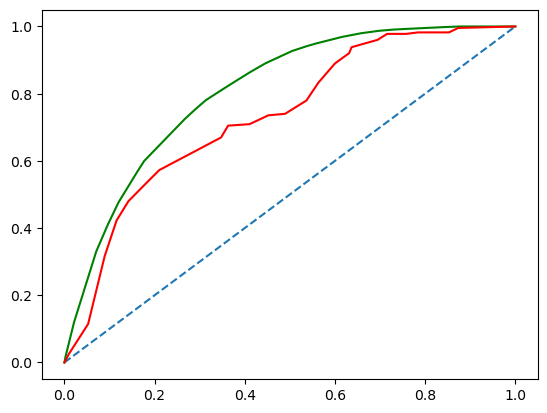

In [193]:
# predict probabilities for train data
cart_model_probs_train = cart_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
cart_model_probs_train = cart_model_probs_train[:,1]
# calculate AUC
cart_model_auc_train = roc_auc_score(y_train, cart_model_probs_train)
print('AUC for training data for CART model: %.3f' % cart_model_auc_train)
#
# predict probabilities for test data
cart_model_probs_test = cart_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
cart_model_probs_test = cart_model_probs_test[:,1]
# calculate AUC
cart_model_auc_test = roc_auc_score(y_test, cart_model_probs_test)
print('AUC for test data for CART model: %.3f' % cart_model_auc_test)
#
#
# calculate roc curve for train data
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, cart_model_probs_train)
# calculate roc curve for test data
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(y_test, cart_model_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the train model
plt.plot(cart_train_fpr, cart_train_tpr, color ='g')
# plot the roc curve for the test model
plt.plot(cart_test_fpr, cart_test_tpr, color ='r')
plt.show()

In [194]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=123, max_depth=7, min_samples_leaf=10, min_samples_split=30)
lda= LinearDiscriminantAnalysis(n_components=1)
lor= LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


                          Train Accuracy  Test Accuracy
Decision Tree Classifier      0.74356334     0.63549161
LDA                           0.65293512     0.61390887
Logistic Regression           0.64881565     0.61630695


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


### Inference on test data : 

For LDA and Logistic Regression, predicting Contraceptive method used (Label 1: 'Yes' ):
   
   <b/>Precision (61%) – 61% of 'Contraceptive method used' predicted are ‘Yes’ out of all 'Contraceptive method used' predicted to be Yes</b>
   
   <b/>Recall (79%) – Out of all the 'Contraceptive method used' actually that are 'Yes', 79% of 'Contraceptive method used' have been predicted correctly</b>
    
For LDA and Logistic Regression, predicting Contraceptive method used (Label 0: 'No' ):

   <b/>Precision (62%) – 62% of 'Contraceptive method used' predicted are ‘No’ out of all 'Contraceptive method used' predicted to be No.</b>
   
   <b/>Recall (40%) – Out of all the 'Contraceptive method used' that are 'No', 40% of 'Contraceptive method used' have been predicted correctly.</b>
   
For CART model, predicting Contraceptive method used (Label 0: 'No'):
    
   <b/>Precision (64%) – 64% of 'Contraceptive method used' predicted are ‘No’ out of all 'Contraceptive method used' predicted to be No.</b>
    
   <b/>Recall (46%) – Out of all the 'Contraceptive method used' that are 'No', 46% of 'Contraceptive method used' have been predicted correctly</b>

For CART model, predicting Contraceptive method used (Label 1: 'Yes'):
    
   <b/>Precision (63%) – 63% of 'Contraceptive method used' predicted are ‘Yes’ out of all 'Contraceptive method used' predicted to be Yes</b>
    
   <b/>Recall (78%) – Out of all the 'Contraceptive method used' actually that are 'Yes', 78% of 'Contraceptive method used' have been predicted correctly</b>

<b/>Since the precision and recall along with accuracy of CART model is better than LDA or Logistic Regression, CART model is best optimized. It can be optimized further to yield accurate Classifier results.</b>

This proves no overfitting or underfitting has happened, and overall the model is a good model for classification.